In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('../MouseOB/AEH_times.csv', index_col=0)

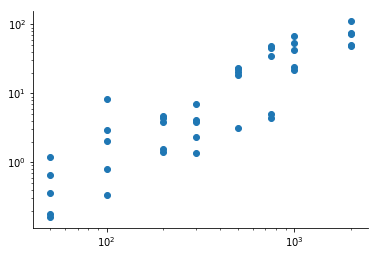

In [3]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df.N, df.time / 60);

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression(normalize=True)
lr.fit(np.log(df[['N']]), np.log(df[['time']]))

/Users/vale/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [6]:
xx = np.linspace(3.5, np.log(20000))[:, None]

In [7]:
yy = lr.predict(xx)

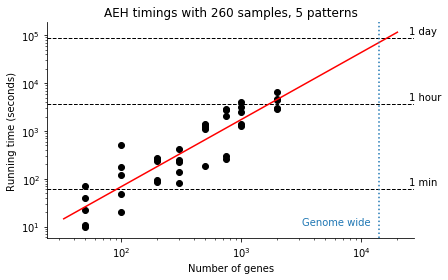

In [9]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df.N, df.time, c='k');
plt.plot(np.exp(xx), np.exp(yy), c='r')

plt.axhline(60, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 min', (25000, 60 * 1.1), va='bottom')

plt.axhline(60 * 60, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 hour', (25000, 60 * 60 * 1.1), va='bottom')

plt.axhline(60 * 60 * 24, lw=1, c='k', zorder=0, ls='--');
plt.annotate('1 day', (25000, 60 * 60 * 24 * 1.1), va='bottom')

plt.axvline(14000, ls=':', c='tab:blue');
plt.annotate('Genome wide', (14000 / 4.4, 10), va='bottom', color='tab:blue')

plt.xlabel('Number of genes')
plt.ylabel('Running time (seconds)')

plt.title('AEH timings with 260 samples, 5 patterns');

plt.tight_layout();
plt.savefig('AEH_timings.pdf', bbox_inches='tight')

In [10]:
# Hours for genome wide clustering into 5 types with 260 samples
np.exp(lr.predict(np.log(14000))) / 60 / 60

array([[ 19.55520315]])